# **1. Import libraries** <a class="anchor" id="6"></a>



In [285]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# **2. Load dataset** <a class="anchor" id="7"></a>

In [286]:
data_path = 'data2.csv'
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,1,64,1,162970,1,1
1,100000002,1,0,29,2,34135,0,1
2,100000003,0,0,33,1,167701,0,0
3,100000004,0,0,41,2,139472,1,1
4,100000005,0,0,36,2,155147,1,2


# **3. EDA** <a class="anchor" id="8"></a>

In [287]:
# Check shape of the dataset
df.shape

(1000, 8)

In [288]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Unnamed: 0       1000 non-null   int64
 1   Sex              1000 non-null   int64
 2   Marital status   1000 non-null   int64
 3   Age              1000 non-null   int64
 4   Education        1000 non-null   int64
 5   Income           1000 non-null   int64
 6   Occupation       1000 non-null   int64
 7   Settlement size  1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [289]:
# Check for missing values in dataset
df.isnull().sum()

Unnamed: 0         0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

### Explore  variables

In [290]:
print("Unique values in column sex:")
print(df["Sex"].unique())
print("\nUnique values in column Education:")
print(df["Education"].unique())
print("\nUnique values in column Education:")
print(df["Education"].unique())
print("\nUnique values in column Occupation:")
print(df["Occupation"].unique())
print("\nUnique values in column Settlement size:")
print(df["Settlement size"].unique())

Unique values in column sex:
[0 1]

Unique values in column Education:
[1 2]

Unique values in column Education:
[1 2]

Unique values in column Occupation:
[1 0]

Unique values in column Settlement size:
[1 0 2]


# **5. Declare feature vector and target variable** <a class="anchor" id="9"></a>

In [291]:
X = df.drop(columns=["Unnamed: 0"])  # Remove Unnamed: 0 from X for clustering

In [292]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [293]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA()  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(data_scaled)

In [294]:
range(pca.n_components_)

range(0, 7)

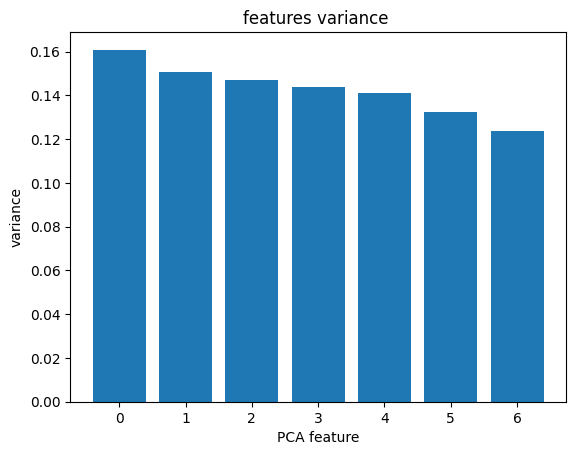

In [295]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.title("features variance ")
plt.show()

In [296]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(data_scaled)
X_pca

array([[-1.39939218,  1.21433723,  0.20211823],
       [ 0.86908627, -1.3973948 ,  0.10438853],
       [-0.56131792, -0.79469627, -2.13706068],
       ...,
       [ 0.44304108,  0.46847221,  0.7665591 ],
       [ 0.36163208,  0.66821447, -0.34030235],
       [-1.6780807 ,  1.26265264,  0.59317706]])

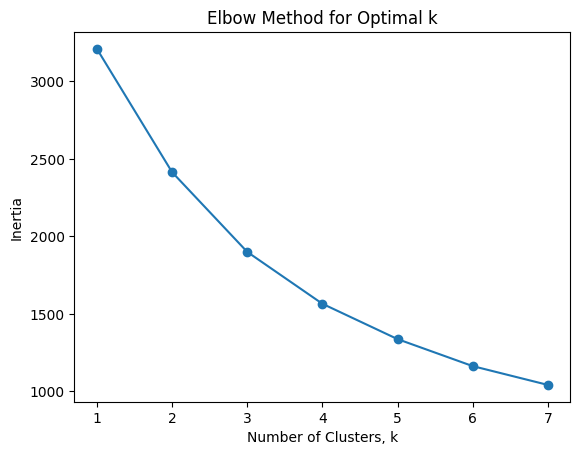

In [297]:
from sklearn.cluster import KMeans

# Find optimal number of clusters using Elbow Method
ks = range(1, 8)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.plot(ks, inertias, "-o")
plt.xlabel("Number of Clusters, k")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [298]:
# Apply K-means with chosen k
optimal_k = 4  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k)
labels = kmeans.fit_predict(X_pca)

In [299]:
X_pca_df=pd.DataFrame(X_pca)
X_pca_df.rename(columns={0: 'component 1', 1: 'component 2', 2: 'component 3' }, inplace=True)
X_pca_df

,component 1,component 2,component 3
0,-1.399392,1.214337,0.202118
1,0.869086,-1.397395,0.104389
2,-0.561318,-0.794696,-2.137061
3,0.413626,0.707409,-0.256034
4,0.779674,0.847554,0.483993
...,...,...,...
995,0.694827,-1.255841,0.411154
996,-1.646871,-0.344865,-0.150764
997,0.443041,0.468472,0.766559
998,0.361632,0.668214,-0.340302


In [300]:
final_df=pd.concat([X_pca_df, pd.DataFrame(labels)], axis=1)
final_df

,component 1,component 2,component 3,0
0,-1.399392,1.214337,0.202118,1
1,0.869086,-1.397395,0.104389,2
2,-0.561318,-0.794696,-2.137061,3
3,0.413626,0.707409,-0.256034,1
4,0.779674,0.847554,0.483993,2
...,...,...,...,...
995,0.694827,-1.255841,0.411154,2
996,-1.646871,-0.344865,-0.150764,0
997,0.443041,0.468472,0.766559,2
998,0.361632,0.668214,-0.340302,1


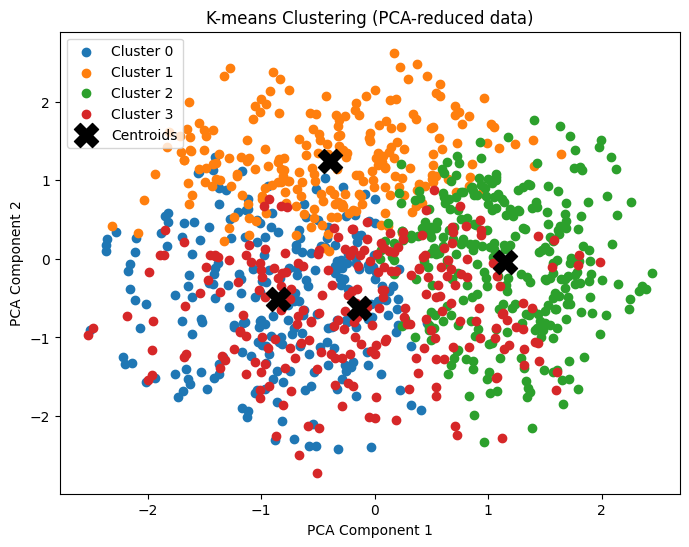

In [301]:
# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f"Cluster {i}")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="black",
    marker="X",
    label="Centroids",
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-means Clustering (PCA-reduced data)")
plt.legend()
plt.show()